In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import sys
import os
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.collections import PathCollection

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

from scipy.optimize import curve_fit

module_name = "utils_v2"
file_path = "/workspaces/TP3/utils_v2.py"

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

# Importer le module
import utils_v2 as u

import pandas as pd

(46,)
(46,)
[0.076618 0.076593 0.074735 0.071159 0.066317 0.060434 0.05403  0.047332
 0.041168 0.035406 0.030376 0.026283 0.022154 0.019013 0.016459 0.014241
 0.012359 0.010952 0.009314 0.007939 0.005679 0.003375 0.001594 0.001533
 0.074784 0.070906 0.0661   0.060253 0.053386 0.04753  0.041394 0.035165
 0.030005 0.025121 0.021783 0.018595 0.016189 0.013893 0.012214 0.010703
 0.009422 0.008359 0.006048 0.003309 0.001682 0.001642]


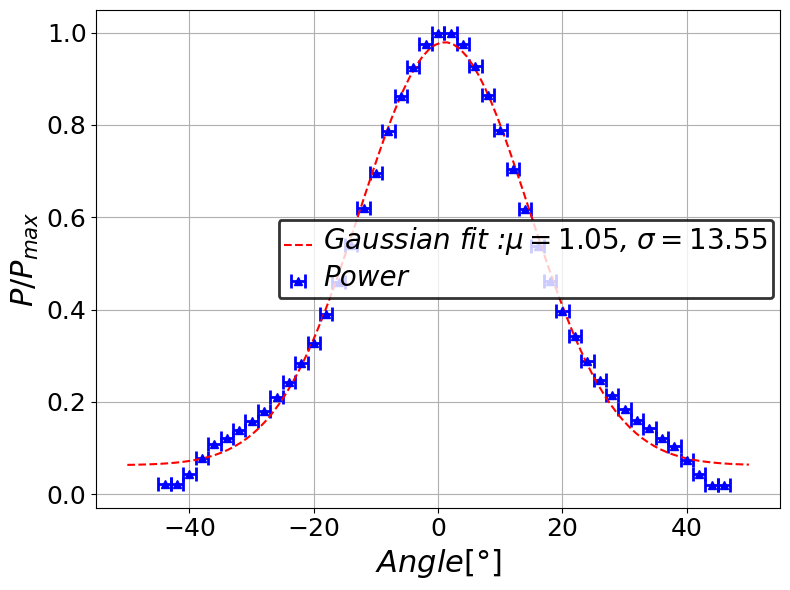

In [3]:
def Gaussian(x,mu,sigma,A,offset): 
    return A*np.exp(-(x-mu)**2/(2*sigma**2)) + offset

#Datas 
#For T = 15°C
#I = 50mA
#Vertical ellipse

Angles = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22])
Angles = 2*Angles

datas = pd.read_csv("/workspaces/TP3/TP_Laser/Datas/H.csv", sep='\t',header=None)
Voltages = datas.iloc[:,1]
Voltages = Voltages.to_numpy()

print(Voltages.shape)
print(Angles.shape)

alpha = 0.117
R_ext = 999
dAngle = 1
dV = 0.01

dVoltages = 0.01*np.ones(len(Voltages))

Powers = (Voltages)/(alpha*R_ext)
dPowers =dV/(alpha*R_ext)


Power_max = np.max(Powers)
Powers = Powers/Power_max
dPowers = dPowers/Power_max


print(Voltages)


xlabel = r"$Angle [\degree]$"
ylabel = r"$P/P_{max}$"

ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)

# ax.plot(Angles,Powers,marker='^',color='blue',label='Power ')

ax.errorbar(Angles,Powers,xerr = dAngle,fmt='^',color='blue',label='Power', capsize=5, capthick=2, elinewidth=2,linestyle='None')
#fit datas ont he gaussian
popt,pcov = curve_fit(Gaussian,Angles,Powers,p0=[0,1,1,0],bounds=([-2,-15,-np.inf,-np.inf],[2,15,np.inf,np.inf]))
mu = popt[0]
sigma = popt[1]
x = np.linspace(-50,50,100)
y = Gaussian(x,*popt)

ax.plot(x,y,label=rf'Gaussian fit :$\mu={mu:.2f}$, $\sigma={sigma:.2f}$',color='red',linestyle='--')



u.set_legend_properties(ax,fontsize=20)

plt.show()

fig.savefig("./Figures/Spatial_Distribution.pdf")


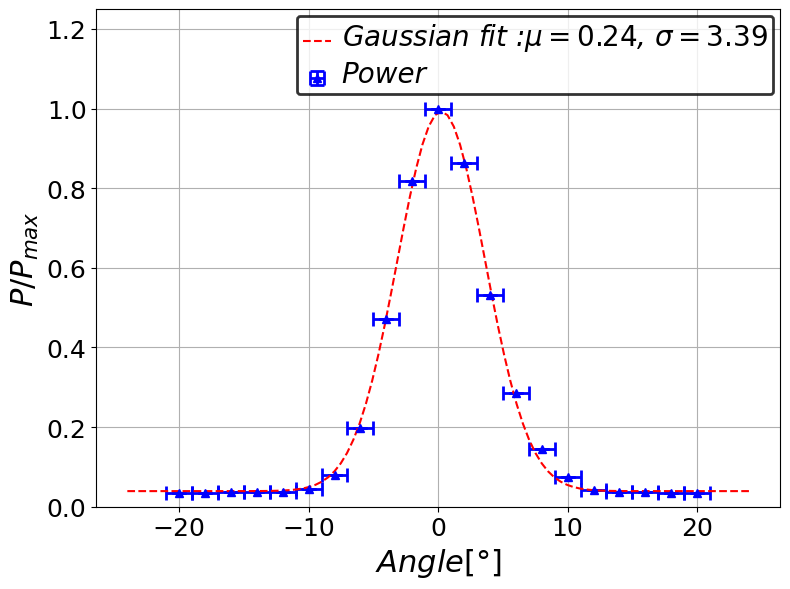

In [4]:
def Gaussian(x,mu,sigma,A,offset): 
    return A*np.exp(-(x-mu)**2/(2*sigma**2)) + offset

Angles = np.array([-20,-18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

Voltages = np.array([0.001759,0.001770,0.001794,0.001825,0.001890,0.002204,0.003896,0.009842,0.023458,0.040590,0.049667,0.042885,0.026444,0.014186,0.007186,0.003660,0.002120,0.001838,0.001785,0.001765,0.001750])

alpha = 0.117
R_ext = 999
dAngle = 1
dV = 0.000001


Powers = (Voltages)/(alpha*R_ext)
dPowers =dV/(alpha*R_ext)


Power_max = np.max(Powers)
Powers = Powers/Power_max
dPowers = dPowers/Power_max




xlabel = r"$Angle [\degree]$"
ylabel = r"$P/P_{max}$"

ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)

# ax.plot(Angles,Powers,marker='^',color='blue',label='Power ')

ax.errorbar(Angles,Powers,xerr = dAngle,yerr=dPowers,fmt='^',color='blue',label='Power', capsize=5, capthick=2, elinewidth=2,linestyle='None')
#fit datas ont he gaussian
popt,pcov = curve_fit(Gaussian,Angles,Powers)
mu = popt[0]
sigma = popt[1]
A = popt[2]
offset = popt[3]
x = np.linspace(-24,24,100)
y = Gaussian(x,*popt)

ax.plot(x,y,label=rf'Gaussian fit :$\mu={mu:.2f}$, $\sigma={sigma:.2f}$',color='red',linestyle='--')

ax.set_ylim(0,1.25)

u.set_legend_properties(ax,fontsize=20)

plt.show()

fig.savefig("./Figures/Spatial_Distribution_V.pdf")


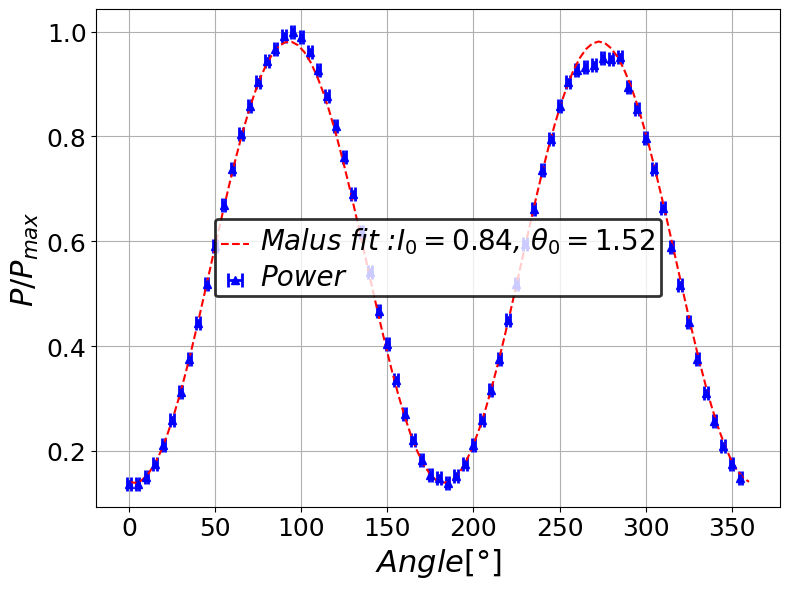

In [5]:
def Malus(theta,I0,offset,theta0):
    return I0*np.cos(theta + theta0)**2+offset

#Datas
#For T = 15°C
P_Angles = np.arange(0,360,5)
P_Angles_err = 1*np.ones(len(P_Angles))

Voltages = pd.read_csv("/workspaces/TP3/TP_Laser/Datas/Polar.csv", sep='\t',header=None)
Voltages = Voltages.iloc[:,1]
Voltages = Voltages.to_numpy()

Powers = (Voltages)/(alpha*R_ext)
Power_max = np.max(Powers)
Powers = Powers/Power_max


xlabel = r"$Angle [\degree]$"
ylabel = r"$P/P_{max}$"

ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)

ax.errorbar(P_Angles,Powers,xerr = P_Angles_err,fmt='^',color='blue',label='Power', capsize=5, capthick=2, elinewidth=2,linestyle='None')

#fit datas on the malus law
popt,pcov = curve_fit(Malus,np.radians(P_Angles),Powers,p0=[1,0,0],bounds=([0,-np.inf,-np.pi/2],[np.inf,np.inf,np.pi/2]))
I0 = popt[0]
offset = popt[1]
theta0 = popt[2]
x = np.linspace(0,2*np.pi,100)
y = Malus(x,*popt)

ax.plot(np.degrees(x),y,label=rf'Malus fit :$I_0={I0:.2f}$, $\theta_0={theta0:.2f}$',color='red',linestyle='--')

u.set_legend_properties(ax,fontsize=20)

plt.show()

fig.savefig("./Figures/Polarization.pdf")







# Specteral Analysis

In [14]:
import pandas as pd
import numpy as np

def process_file(file_path):
    # Read the file and skip the last two rows
    df = pd.read_csv(file_path, sep='\t', header=18)[:-2]
    
    # Convert columns to numeric types explicitly
    df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')
    df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors='coerce')
    
    # Drop rows with invalid data (if any)
    df = df.dropna()

    # Return wavelength and intensity arrays
    return df.iloc[:, 0].to_numpy(), df.iloc[:, 1].to_numpy()

# File paths
files = [
    "/workspaces/TP3/TP_Laser/Datas/Spectrum9_6.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum12_3.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum15.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum17_6.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum20_0.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum22_5.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum25_5.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum27_4.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum30_0.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum32_8.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum35_2.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum37_6.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum40_0.txt",
]

# Process all files
wavelengths = []
intensities = []

for file in files:
    wavelength, intensity = process_file(file)
    wavelengths.append(wavelength)
    intensities.append(intensity)

# Convert to NumPy arrays
wavelengths = np.array(wavelengths)
intensities = np.array(intensities)

intensities = intensities / np.max(intensities, axis=1)[:, np.newaxis]

# Temperature array
T = np.array([9.6, 12.3, 15, 17.6, 20, 22.5, 25.5, 27.4, 30, 32.8, 35.2, 37.6, 40])




# Update the file paths and temperatures
files_3 = [
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_10_0.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_12_0.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_14_8.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_17_5.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_19_0.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_21_7.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_24_0.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_29_8.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_31_5.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_34_9.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_37_3.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_3/Spectrum_39_8.txt",
]

# Process all files
wavelengths_3 = []
intensities_3 = []

for file in files_3:
    wavelength, intensity = process_file(file)
    wavelengths_3.append(wavelength)
    intensities_3.append(intensity)

# Convert to NumPy arrays
wavelengths_3 = np.array(wavelengths_3)
intensities_3 = np.array(intensities_3)

intensities_3 = intensities_3 / np.max(intensities_3, axis=1)[:, np.newaxis]

# Temperature array
T_3 = np.array([10.0, 12.0, 14.8, 17.5, 19.0, 21.7, 24.0, 29.8, 31.5, 34.9, 37.3, 39.8])




# Update the file paths and temperatures
files_2 = [
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_9_8.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_12_5.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_15_1.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_17_6.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_20_3.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_22_8.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_25_2.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_28_8.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_30_2.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_35_4.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_37_7.txt",
    "/workspaces/TP3/TP_Laser/Datas/Spectrum_2/Spectrum_40_1.txt",
]

# Process all files
wavelengths_2 = []
intensities_2 = []

for file in files_2:
    wavelength, intensity = process_file(file)
    wavelengths_2.append(wavelength)
    intensities_2.append(intensity)

# Convert to NumPy arrays
wavelengths_2 = np.array(wavelengths_2)
intensities_2 = np.array(intensities_2)

intensities_2 = intensities_2 / np.max(intensities_2, axis=1)[:, np.newaxis]

# Temperature array
T_2 = np.array([9.8, 12.5, 15.1, 17.6, 20.3, 22.8, 25.2, 28.8, 30.2, 35.4, 37.7, 40.1])











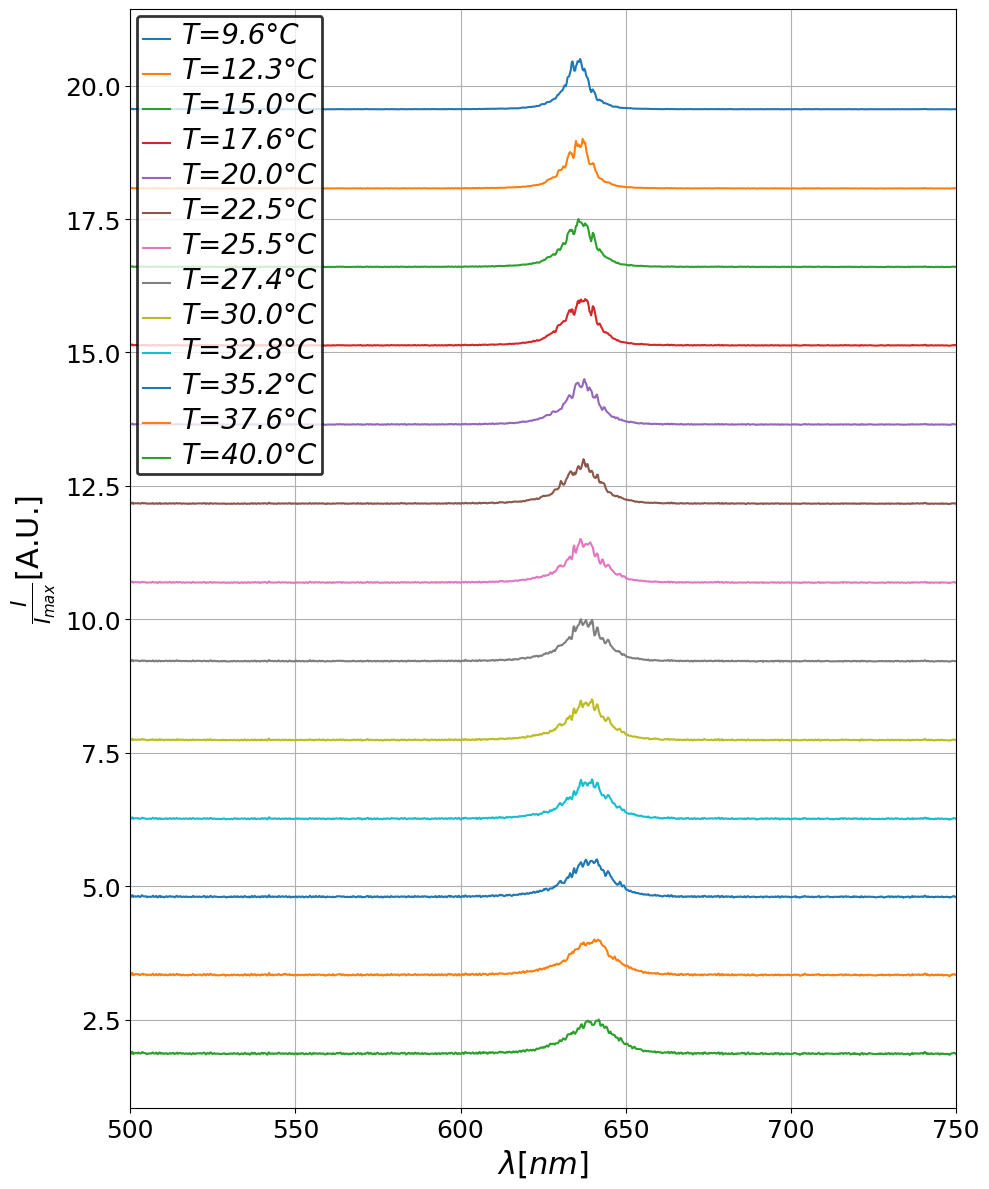

In [7]:
xlabel = r"$\lambda [nm]$"
ylabel = r"$\frac{I}{I_{max}}$[A.U.]"


# for i in range(len(wavelengths)):
#     ax,fig = u.create_figure_and_apply_format((12,6),xlabel=xlabel, ylabel=ylabel)
#     ax.plot(wavelengths[i],intensities[i],color='blue',label=f'T={T[i]}°C')
#     u.set_legend_properties(ax,fontsize=20)
#     plt.show()
#     fig.savefig(f"./Figures/Spectrum_{T[i]}.pdf")
    


# Plot all spectroscopies on the same plot with offsets
offset = 1.5  # Define an offset value

ax, fig = u.create_figure_and_apply_format((10, 12), xlabel=xlabel, ylabel=ylabel)

for i in range(len(wavelengths)):
    ax.plot(wavelengths[i], intensities[i] + (len(wavelengths)-i) * offset, label=f'T={T[i]}°C')

ax.set_xlim(500,750)
u.set_legend_properties(ax, fontsize=20)
plt.show()
fig.savefig("./Figures/All_Spectroscopies.pdf")
fig.savefig("./Figures/All_Spectroscopies.png")



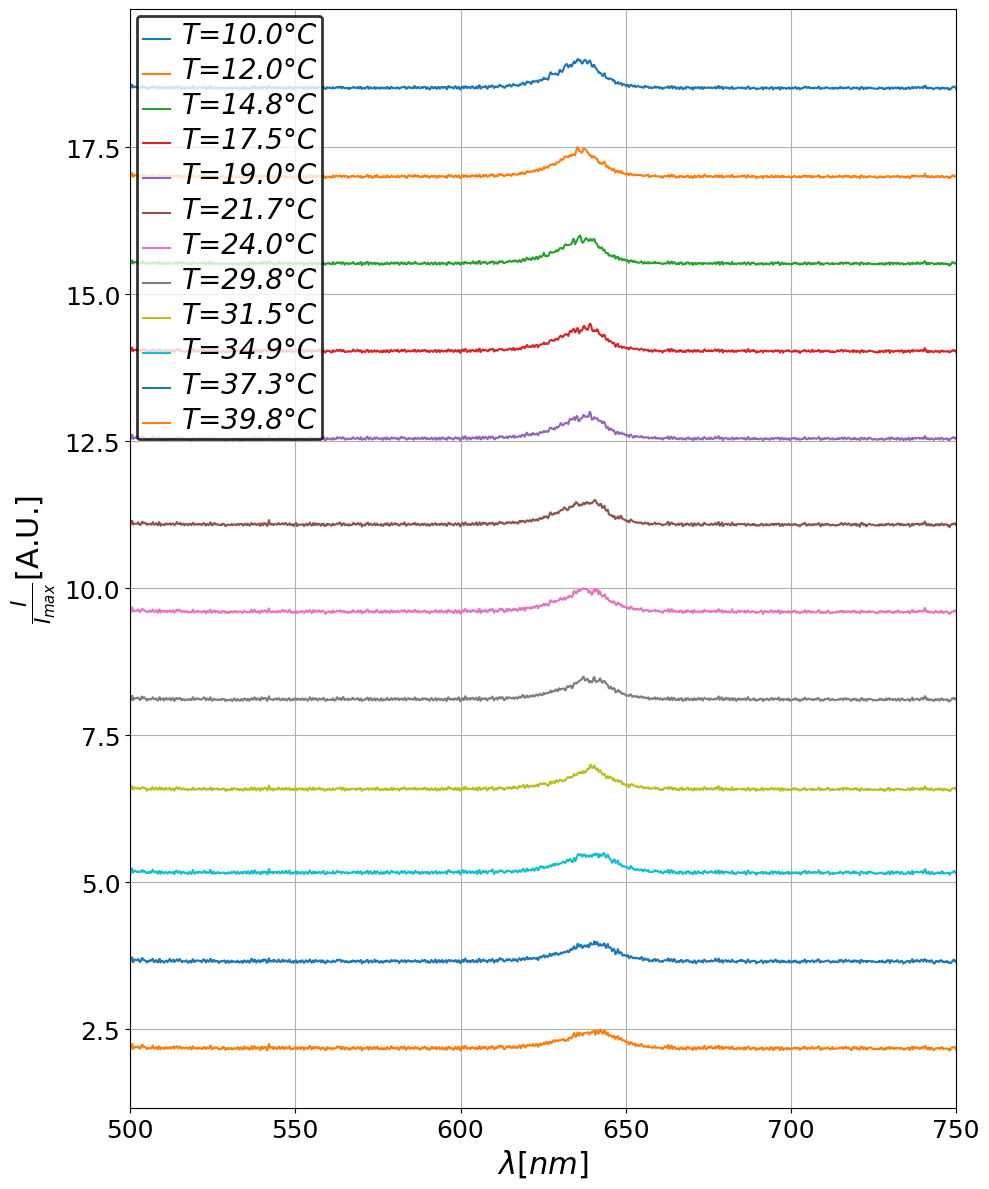

In [9]:
xlabel = r"$\lambda [nm]$"
ylabel = r"$\frac{I}{I_{max}}$[A.U.]"


# Plot all spectroscopies on the same plot with offsets
offset = 1.5  # Define an offset value

ax, fig = u.create_figure_and_apply_format((10, 12), xlabel=xlabel, ylabel=ylabel)

for i in range(len(wavelengths_2)):
    ax.plot(wavelengths_2[i], intensities_2[i] + (len(wavelengths_2)-i) * offset, label=f'T={T_2[i]}°C')

ax.set_xlim(500,750)
u.set_legend_properties(ax, fontsize=20,loc = "upper left")
plt.show()
fig.savefig("./Figures/All_Spectroscopies_2.pdf")
fig.savefig("./Figures/All_Spectroscopies_2.png")

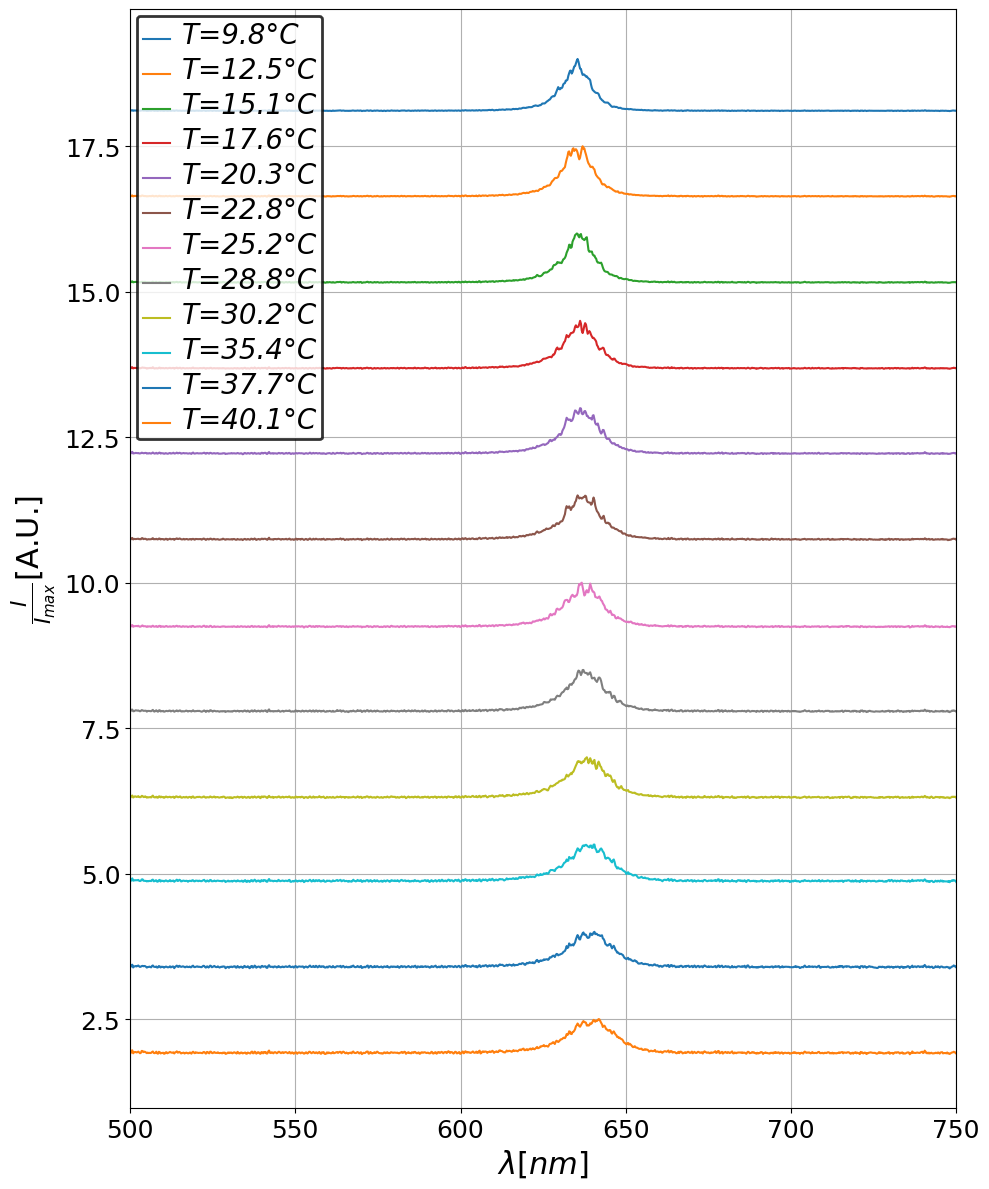

In [15]:
xlabel = r"$\lambda [nm]$"
ylabel = r"$\frac{I}{I_{max}}$[A.U.]"

# Plot all spectroscopies on the same plot with offsets
offset = 1.5  # Define an offset value

ax, fig = u.create_figure_and_apply_format((10, 12), xlabel=xlabel, ylabel=ylabel)

for i in range(len(wavelengths_2)):
    ax.plot(wavelengths_2[i], intensities_2[i] + (len(wavelengths_2)-i) * offset, label=f'T={T_2[i]}°C')

ax.set_xlim(500,750)
u.set_legend_properties(ax, fontsize=20, loc="upper left")
plt.show()
fig.savefig("./Figures/All_Spectroscopies_2.pdf")
fig.savefig("./Figures/All_Spectroscopies_2.png")